<h1>Statistical Analysis with Pingouin<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 1</a></span></li><li><span><a href="#Outlook" data-toc-modified-id="Outlook-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Outlook</a></span></li></ul></div>

[**_Pingouin_**](https://pingouin-stats.org) is a compact package that provides the most important test tools for a significance study. 

![img/pingouin.png](img/pingouin.png)

<div class="alert alert-block alert-info">
<b>Info:</b> It is worth visiting the <i>Pingouin</i> website (follow link above). The website provides a very good overview of available significance tests and also a decision tree that helps selecting the correct test for the respective data set.
</div>

Screenshots from [pingouin-stats.org/guidelines.html](https://pingouin-stats.org/guidelines.html):
![img/pingouin.png](img/pingouin_1.png)
![img/pingouin.png](img/pingouin_2.png)

Let's recap our last example from the _Pandas_ chapter:

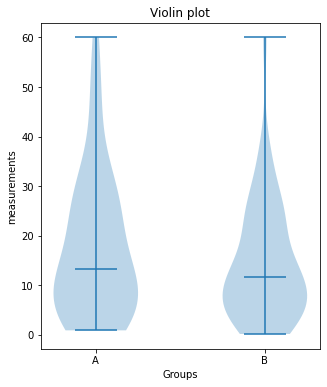

In [15]:
# Example from the Pandas chapter (just with the Violin plot):
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg

# Define file paths:
file_path = "Data/Pandas_1/"
file_name_1 = "Group_A_data.xls"
file_name_2 = "Group_B_data.xls"

file_1 = os.path.join(file_path, file_name_1)
file_2 = os.path.join(file_path, file_name_2)

# Read the Excel files with Pandas into a Pandas Dataframe:
Group_A_df = pd.read_excel(file_1, index_col=0)
Group_B_df = pd.read_excel(file_2, index_col=0)

# Broadcast the DataFrame data into the approproate variables:
Group_A = Group_A_df["Data"].values
Group_B = Group_B_df["Data"].values

# VIOLIN-PLOTS:
fig=plt.figure(3, figsize=(5,6))
fig.clf()

plt.violinplot([Group_A, Group_B], showmedians=True)

plt.xticks([1,2], labels=["A", "B"])
plt.xlabel("Groups")
plt.ylabel("measurements")
plt.title("Violin plot")
plt.tight_layout
# plt.ylim(-40, 40)
plt.show()
fig.savefig("violinplot with data.pdf", dpi=120)

We now want to know, whether the difference between the two groups is significant or not. Let's assume, that our data is normally distributed and the two samples are independent. The corresponding test would be an unpaired, two-sample student's t-test. The corresponding _Pingouin_ command is the following:

In [35]:
test_result = pg.ttest(Group_A, Group_B, paired=False)
#print(test_result)
display(test_result)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.154936,98,two-sided,0.250925,"[-2.19, 8.28]",0.230987,0.381,0.208113


As we can see, the output of this _Pingouin_ command is not just a single value, e.g., the _p_-value, but a table. To be more correct, this table actually is a _Pandas_ DataFrame. Besides the _p_-value (`p-val`), the DataFrame contains other useful statistical properties:
- `T` : _T_-value
- `p-val` : _p_-value
- `dof` : degrees of freedom
- `cohen-d` : Cohen's _d_ effect size
- `CI95%` : 95% confidence intervals of the difference in means
- `power` : achieved power of the test ( = 1 - type II error)
- `BF10` : Bayes Factor of the alternative hypothesis

Note, that for DataFrames with many keys, by default the `print` command doesn't print out all of them. To get a list of all available keys, use the command `DataFrame.keys()`:

In [36]:
# applied to our test_result-DataFrame:
print(test_result.keys())

Index(['T', 'dof', 'tail', 'p-val', 'CI95%', 'cohen-d', 'BF10', 'power'], dtype='object')


To access the data of a specific key, just use the same syntax as for dictionaries and add "`.values`" in order to "extract" the value from the DataFrame structure:

In [37]:
print(f"the p-value of our test is:", 
      f"{test_result['p-val'].values}")

the p-value of our test is: [0.25092508]


In [38]:
# Just recently explored: There is the display-command,
# that always prints out Pandas tables/DataFrames in 
# formatted shape:
display(test_result)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.154936,98,two-sided,0.250925,"[-2.19, 8.28]",0.230987,0.381,0.208113


In [ ]:
""" You can install pingouin also from within Jupyter. 
    Uncomment and run the following cell ones (and then 
    comment it again):
"""
#import sys
#!{sys.executable} -m pip install pingouin

## Exercise 1

Copy the solution of the _Pandas_ example above into a new script. Extend your script by the following functionalities:
    
1. Apply the significance test to the `Group_A` and `Group_B` data.
2. Write an _if_-statement that checks, whether the _p_-value of the significance test is lower or greater than 0.05. If the _p_-value is lower, then print out "_there is a significant difference_" together with the according _p_-value, otherwise print out "_no significant difference_" together with the according _p_-value.
3. Plug-in the significance check-up into a function, e.g. named `unpaired_two_sample_ttest(...)`.

In [9]:
# Your solution 1.1 and 1.2 here:


no significant difference (p-value: [0.25092508])


<details>
<summary>Toggle solution</summary>

```python
# Solution 1.1 and 1.2:
test_result = pg.ttest(Group_A, Group_B, paired=False)
p_value = test_result["p-val"].values

if p_value>0.05:
    print(f"no significant difference (p-value: {p_value})")
else:
    print(f"here is a significant difference (p-value: {p_value})")
``` 
<script src="https://gist.github.com/username/a39a422ebdff6e732753b90573100b16.js"></script>
</details>

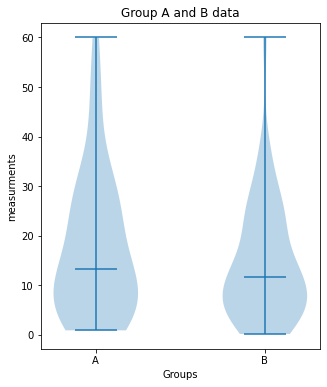

Group_A vs. Group_B:
no significant difference (p-value: [0.25092508])


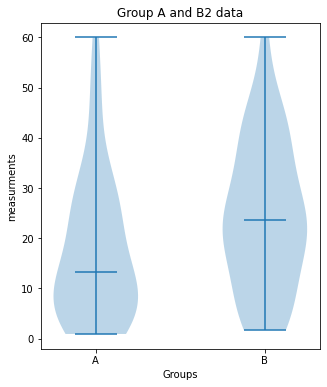

Group_A vs. Group_B2:
significant difference (p-value: [0.02157014])


In [9]:
# Your solution 1.3 here:


<details>
<summary>Toggle solution</summary>

```python
# Solution 1.3:
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg

# Define file paths:
file_path = "Data/Pandas_1/"
file_name_1 = "Group_A_data.xls"
file_name_2 = "Group_B_data.xls"
file_name_3 = "Group_B2_data.xls"

file_1 = os.path.join(file_path, file_name_1)
file_2 = os.path.join(file_path, file_name_2)
file_3 = os.path.join(file_path, file_name_3)

# Read the Excel files with Pandas into a Pandas Dataframe:
Group_A_df = pd.read_excel(file_1, index_col=0)
Group_B_df = pd.read_excel(file_2, index_col=0)
Group_B2_df= pd.read_excel(file_3, index_col=0)

# Broadcast the DataFrame data into the approproate variables:
Group_A = Group_A_df["Data"].values
Group_B = Group_B_df["Data"].values
Group_B2= Group_B2_df["Data"].values


# DEFINE PLOT-FUNCTIONS:
def plot_violin(A, B, fignum, figaspect, the_title):
    fig = plt.figure(fignum, figsize=figaspect)
    fig.clf()

    x_ticks_A = np.ones(len(A))
    x_ticks_B = np.ones(len(B))

    plt.violinplot([A, B], showmedians=True)
    plt.xticks([1,2], labels=["A", "B"])
    plt.xlabel("Groups")
    plt.ylabel("measurements")
    plt.title(the_title)
    plt.tight_layout
    # plt.ylim(-40, 40)
    plt.show()
    
    
# DEFINE SIGNFICANCE-TEST-FUNCTIONS:
def unpaired_two_sample_ttest(A, B):
    test_result = pg.ttest(A, B, paired=False)
    p_value = test_result["p-val"].values
    if p_value>0.05:
        print(f"no significant difference (p-value: {p_value})")
    else:
        print(f"significant difference (p-value: {p_value})")


# Our actual analysis:
plot_violin(Group_A, Group_B, 7, (5,6), "Group A and B data")
print("Group_A vs. Group_B:")
unpaired_two_sample_ttest(Group_A, Group_B)

plot_violin(Group_A, Group_B2, 7, (5,6), "Group A and B2 data")
print("Group_A vs. Group_B2:")
unpaired_two_sample_ttest(Group_A, Group_B2)
``` 
<script src="https://gist.github.com/username/a39a422ebdff6e732753b90573100b16.js"></script>
</details>

In [26]:
norm_A= pg.normality(Group_A)
display(norm_A)

,W,pval,normal
0,0.900276,0.000491,False


In [30]:
norm_A["normal"].values

array([False])

In [33]:
# You can let Python decide, whether to apply a student's t-test for 
# normally distributed data or a Mann-Whitney U test for not-normally
# distributed data:

if norm_A["normal"].values:
    print("Group A is normally distributed")
    # ttest
    test_result = pg.ttest(Group_A, Group_B, paired=False)
    test_type="ttest"
else:
    print("Group A is not normally distributed")
    # mwu test
    test_result = pg.mwu(Group_A, Group_B)
    test_type="mwu" # can be further used e.g. for an 
                    # additional print-out
test_result

Group A is not normally distributed


,U-val,tail,p-val,RBC,CLES
MWU,1373.5,two-sided,0.39647,-0.0988,0.5494


## Outlook
Now imagine, that you have several Excel files to be read and processed. In this case it's highly recommended to plug-in, e.g., the data import and the analysis part into **_for_-loops**, while the imported data have to be plugged into iterable **_NumPy_ Arrays**. Also think about that you have several data project folders and you don't want to look into each of them. In order prevent your routine from crashing, you could implement an **_if_-statement** that checks during the data import, whether files could be imported or not. And, whenever possible, plug-in complex and repetitive calculations and procedures into a **function definition** in order to keep your code readble and to save lines of unnecessary code.